# Question 2: Enzyme Kinetics

### Question 1. 

1. d[E]/dt = -k1[E][S] + k2[ES] + k3[ES]
2. d[S]/dt = -k1[E][S] + k2[ES]
3. d[ES]/dt = k1[E][S] - (k2+k3)[ES]
4. d[P]/dt = k3[ES]


### Question 2. 

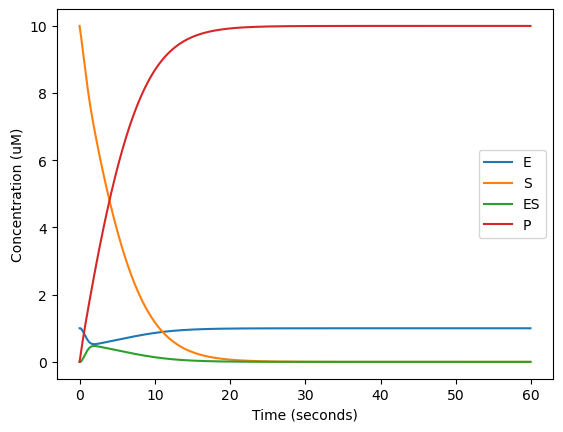

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rate constants per second
k1 = 100/60
k2 = 600/60
k3 = 150/60

# Define the time step and total simulation time
dt = 0.1
T = 60

# Create arrays to store the results
t = np.arange(0, T, dt)
E = np.zeros(t.shape)
S = np.zeros(t.shape)
ES = np.zeros(t.shape)
P = np.zeros(t.shape)

# Set the initial concentrations
E[0] = 1
S[0] = 10
ES[0] = 0
P[0] = 0


# Using Runge-Kutta method to solve the 4 differential equations from 8.1
for i in range(1, t.size):
    k1E = -k1*E[i-1]*S[i-1] + k2*ES[i-1] + k3*ES[i-1]
    k1S = -k1*E[i-1]*S[i-1] + k2*ES[i-1]
    k1ES = k1*E[i-1]*S[i-1] - (k2 + k3)*ES[i-1]
    k1P = k3*ES[i-1]
    
    k2E = -k1*(E[i-1] + k1E*dt/2)*(S[i-1] + k1S*dt/2) + k2*(ES[i-1] + k1ES*dt/2) + k3*(ES[i-1] + k1ES*dt/2)
    k2S = -k1*(E[i-1] + k1E*dt/2)*(S[i-1] + k1S*dt/2) + k2*(ES[i-1] + k1ES*dt/2)
    k2ES = k1*(E[i-1] + k1E*dt/2)*(S[i-1] + k1S*dt/2) - (k2 + k3)*(ES[i-1] + k1ES*dt/2)
    k2P = k3*(ES[i-1] + k1ES*dt/2)
    
    k3E = -k1*(E[i-1] + k2E*dt/2)*(S[i-1] + k2S*dt/2) + k2*(ES[i-1] + k2ES*dt/2) + k3*(ES[i-1] + k2ES*dt/2)
    k3S = -k1*(E[i-1] + k2E*dt/2)*(S[i-1] + k2S*dt/2) + k2*(ES[i-1] + k2ES*dt/2)
    k3ES = k1*(E[i-1] + k2E*dt/2)*(S[i-1] + k2S*dt/2) - (k2 + k3)*(ES[i-1] + k2ES*dt/2)
    k3P = k3*(ES[i-1] + k2ES*dt/2)
    
    k4E = -k1*(E[i-1] + k3E*dt)*(S[i-1] + k3S*dt) + k2*(ES[i-1] + k3ES*dt) + k3*(ES[i-1] + k3ES*dt)
    k4S = -k1*(E[i-1] + k3E*dt)*(S[i-1] + k3S*dt) + k2*(ES[i-1] + k3ES*dt)
    k4ES = k1*(E[i-1] + k3E*dt)*(S[i-1] + k3S*dt) - (k2 + k3)*(ES[i-1] + k3ES*dt)
    k4P = k3*(ES[i-1] + k3ES*dt)
   
    E[i] = E[i-1] + (k1E + 2*k2E + 2*k3E + k4E)*dt/6
    S[i] = S[i-1] + (k1S + 2*k2S + 2*k3S + k4S)*dt/6
    ES[i] = ES[i-1] + (k1ES + 2*k2ES + 2*k3ES + k4ES)*dt/6
    P[i] = P[i-1] + (k1P + 2*k2P + 2*k3P + k4P)*dt/6
    


# Plot the results
plt.figure()
plt.plot(t, E, label='E')
plt.plot(t, S, label='S')
plt.plot(t, ES, label='ES')
plt.plot(t, P, label='P')
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration (uM)')
plt.legend()
plt.show()

### Question 3 

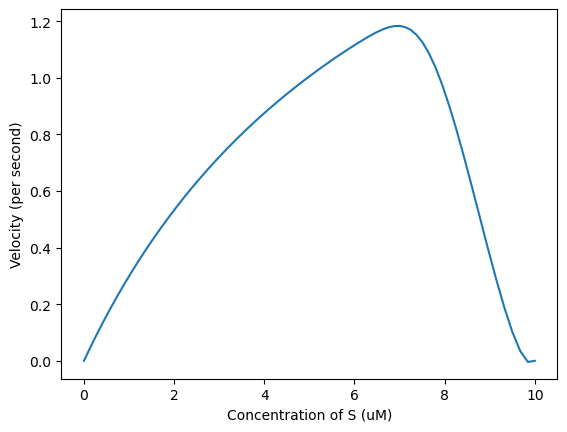

1.183689686997655
71.0213812198593


In [7]:
V=k3*ES

#plot v against S
plt.plot (S,V)
plt.xlabel('Concentration of S (uM)')
plt.ylabel('Velocity (per second)')
plt.show()

#To find the maximum of V (per second)
print (max(V))

#Convert the unit of the velocity Vm to per minute
print (max(V)*60)


From my plot generated by the above code, the value Vm is found to be 71.021 uM/min